## Data Collection

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
import time

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
url = 'https://www.usatoday.com/sports/mlb/salaries/'

In [4]:
html = requests.get(url)

In [5]:
html

<Response [200]>

In [6]:
soup = BeautifulSoup(html.content, 'html.parser')

In [7]:
rankings_container = soup.find('tbody')

In [8]:
names = rankings_container.findAll('td', class_ = 'player_display')
first = names[0].get_text()

In [9]:
first

'\n                                            Max Scherzer\n                                        '

In [10]:
first = first.replace('\n', "")
first = first.replace(" ", "")

In [11]:
first

'MaxScherzer'

In [12]:
teams = rankings_container.findAll('td', class_ = 'team_abbr')
first_team = teams[0].find('a').get_text()
first_team = first_team.replace('\n', "")
first_team = first_team.replace(" ", "")
first_team

'WSH'

In [13]:
positions = rankings_container.findAll('td', class_ = 'position')
first_position = positions[0].get_text()
first_position = first_position.replace('\n', "")
first_position = first_position.replace(" ", "")
first_position

'SP'

In [14]:
salaries = rankings_container.findAll('td', class_ = 'salary')
first_salary = salaries[0].get_text()
first_salary = first_salary.replace('\n', "")
first_salary = first_salary.replace(' ', "")
first_salary

'$42,142,857'

In [15]:
names = []

def player_names(rankings_container):
#     names = []
    for item in rankings_container:
#         print(item)
        name = item.find('td', class_='player_display')
#         print(name)
        if name:
            name = name.get_text()
            name = name.replace('\n', "")
            name = name.replace(" ", "")
            names.append(name)
        else:
            names.append("NaN")
    return names

names = player_names(rankings_container)

In [16]:
teams = []

def all_teams(rankings_container):
    for item in rankings_container:
        team = item.find('td', class_='team_abbr')
        if team:
            team = team.get_text()
            team = team.replace('\n', "")
            team = team.replace(' ', "")
            teams.append(team)
        else:
            teams.append("NaN")
    return teams

teams = all_teams(rankings_container)

In [17]:
positions = []

def all_positions(rankings_container):
    for item in rankings_container:
        position = item.find('td', class_='position')
        if position:
            position = position.get_text()
            position = position.replace('\n', "")
            position = position.replace(' ', "")
            positions.append(position)
        else:
            positions.append("NaN")
    return positions

postions = all_positions(rankings_container)

In [18]:
salaries = []

def all_salaries(rankings_container):
    for item in rankings_container:
        salary = item.find('td', class_='salary')
        if salary:
            salary = salary.get_text()
            salary = salary.replace('$', "")
            salary = salary.replace(',', "")
            salary = salary.replace('\n', "")
            salary = salary.replace(' ', "")
            salaries.append(int(salary))
        else:
            salaries.append("NaN")
    return salaries


salaries = all_salaries(rankings_container)

In [19]:
player_info = {'name': names, 'team': teams, 'position': positions, 'salary': salaries}

In [20]:
df = pd.DataFrame(player_info)

In [21]:
df.head()

,name,team,position,salary
0,MaxScherzer,WSH,SP,42142857
1,StephenStrasburg,WSH,SP,36428571
2,MikeTrout,LAA,CF,34083333
3,ZackGreinke,ARI,SP,32421884
4,DavidPrice,BOS,SP,31000000


In [22]:
df.shape

(877, 4)

## Data Cleaning & EDA

In [23]:
df.head()

,name,team,position,salary
0,MaxScherzer,WSH,SP,42142857
1,StephenStrasburg,WSH,SP,36428571
2,MikeTrout,LAA,CF,34083333
3,ZackGreinke,ARI,SP,32421884
4,DavidPrice,BOS,SP,31000000


In [24]:
df.shape

(877, 4)

In [25]:
df['salary'] = df['salary'].map(lambda x: round(x/1000, 1))

In [26]:
df.describe()

,salary
count,877.000000
mean,4509.877423
std,6334.236035
min,555.000000
25%,567.500000
50%,1400.000000
75%,6000.000000
max,42142.900000


In [27]:
df.rename(columns = {'salary': 'salary_in_k'}, inplace=True)

In [28]:
df.columns

Index(['name', 'team', 'position', 'salary_in_k'], dtype='object')

In [29]:
df.isnull().sum()

name           0
team           0
position       0
salary_in_k    0
dtype: int64

In [30]:
df.dtypes

name            object
team            object
position        object
salary_in_k    float64
dtype: object

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

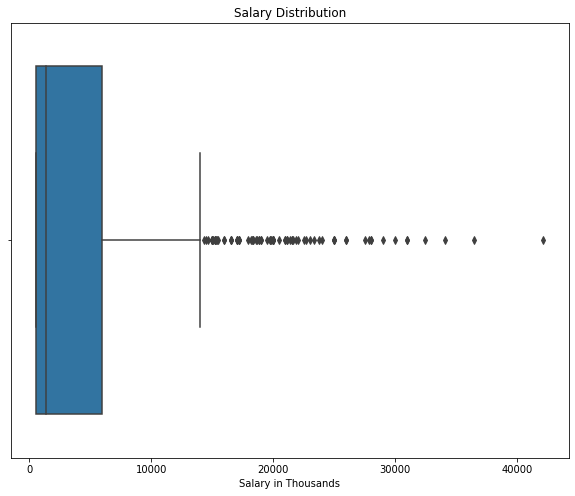

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(df['salary_in_k'])
plt.xlabel("Salary in Thousands")
plt.title("Salary Distribution")

plt.show()

In [33]:
Q1 = df['salary_in_k'].quantile(0.25)
Q3 = df['salary_in_k'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

5432.5


In [34]:
df = df[~((df['salary_in_k'] < (Q1 - 1.5 * IQR)) |(df['salary_in_k'] > (Q3 + 1.5 * IQR)))]
df.shape

(796, 4)

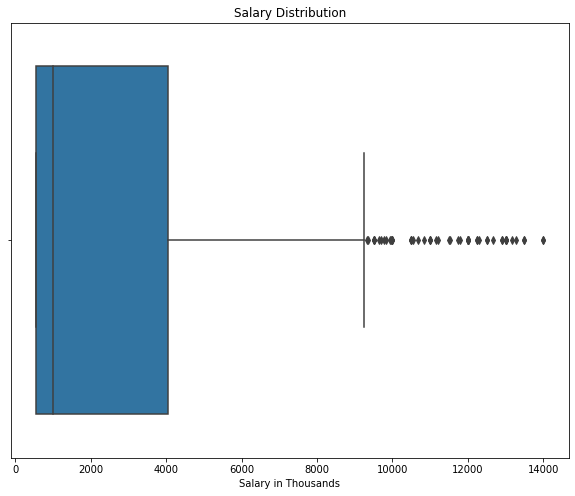

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(df['salary_in_k'])
plt.xlabel("Salary in Thousands")
plt.title("Salary Distribution")

plt.show()

In [36]:
df['salary_in_k'].describe()

count      796.000000
mean      2845.077136
std       3325.524571
min        555.000000
25%        565.000000
50%       1000.000000
75%       4043.750000
max      14000.000000
Name: salary_in_k, dtype: float64

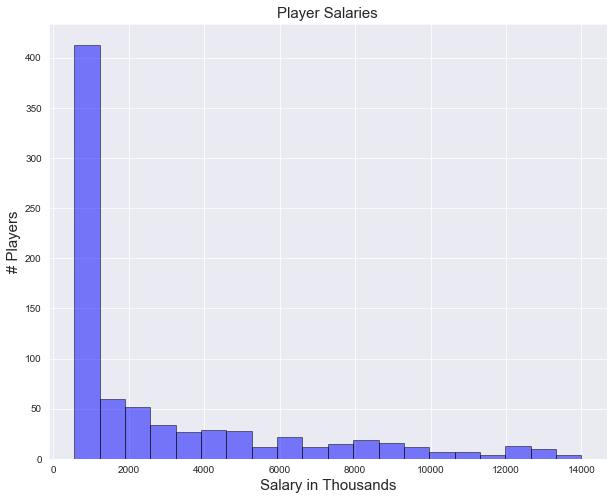

In [37]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10,8))

plt.hist(df['salary_in_k'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
plt.xlabel('Salary in Thousands',fontsize = 15)
plt.ylabel('# Players',fontsize = 15)
plt.title('Player Salaries',fontsize = 15)

plt.show()

In [38]:
position_group = df.groupby(['position'])
position_group.aggregate(['mean', min, max])

salary_in_k                 
                 mean     min      max
position                              
1B        2732.428571   555.0  13000.0
2B        4095.795745   555.0  13500.0
3B        3257.700000   555.0  13166.7
C         2301.675000   555.0  11500.0
CF        3336.903226   557.5  12000.0
DH        8693.600000  1000.0  13274.4
LF        2847.896875   556.4  12250.0
OF        1143.637838   555.0   6700.0
RF        4508.066667   555.0  14000.0
RP        2159.951128   555.0  13000.0
SP        3504.319632   555.0  14000.0
SS        3005.485714   555.0  13000.0

In [39]:
team_group = df.groupby(['team'])
team_group.aggregate(['mean', min, max])

salary_in_k                
             mean    min      max
team                             
ARI   2680.850000  555.0   7000.0
ATL   2722.088889  560.0  11166.7
BAL   2181.314815  555.0  14000.0
BOS   2815.377273  557.0  12000.0
CHC   4771.026923  556.5  12900.0
CIN   3459.628000  557.5  10000.0
CLE   2711.861538  555.0  13000.0
COL   3024.139130  557.0  13000.0
CWS   2764.888889  555.0   9166.7
DET   1795.130769  555.0   9950.0
HOU   4866.120000  566.6  13500.0
KC    1716.810714  555.0  11200.0
LAA   3184.840000  556.5  13000.0
LAD   2069.850000  560.0   5250.0
MIA   1433.460000  555.0  12000.0
MIL   2831.196296  558.4  10000.0
MIN   3592.925000  555.0  12000.0
NYM   3428.653571  555.0   9100.0
NYY   3754.996296  555.0  13000.0
OAK   2757.580645  557.5  12000.0
PHI   4182.648000  559.0  11538.5
PIT   2305.545455  557.5  11500.0
SD    1747.445161  555.0  12000.0
SEA   2504.484615  555.2  14000.0
SF    2736.211111  555.0  12000.0
STL   3785.396154  555.0  13166.7
TB    1425.955556  556.5   8583.3
TEX   2719.996154  555.0   9833.3
TOR   2225.896875  555.0   8000.0
WSH   3697.683333  555.0  12916.7

In [40]:
team_dummies = pd.get_dummies(df['team'], drop_first = True)
# print(team_dummies.head())
df = pd.concat([df, team_dummies], axis = 1)
df.head()

,name,team,position,salary_in_k,ATL,BAL,BOS,CHC,CIN,CLE,COL,CWS,DET,HOU,KC,LAA,LAD,MIA,MIL,MIN,NYM,NYY,OAK,PHI,PIT,SD,SEA,SF,STL,TB,TEX,TOR,WSH
81,JayBruce,SEA,RF,14000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
82,AlexCobb,BAL,SP,14000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83,GerritCole,HOU,SP,13500.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,DeeGordon,SEA,2B,13500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
85,MarkTrumbo,BAL,DH,13274.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
position_dummies = pd.get_dummies(df['position'], drop_first = True)
# print(position_dummies.head())
df = pd.concat([df, position_dummies], axis = 1)
df.head()

,name,team,position,salary_in_k,ATL,BAL,BOS,CHC,CIN,CLE,COL,CWS,DET,HOU,KC,LAA,LAD,MIA,MIL,MIN,NYM,NYY,OAK,PHI,PIT,SD,SEA,SF,STL,TB,TEX,TOR,WSH,2B,3B,C,CF,DH,LF,OF,RF,RP,SP,SS
81,JayBruce,SEA,RF,14000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
82,AlexCobb,BAL,SP,14000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
83,GerritCole,HOU,SP,13500.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
84,DeeGordon,SEA,2B,13500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
85,MarkTrumbo,BAL,DH,13274.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
df.drop(columns = ['team', 'position'], axis=1, inplace=True)

In [43]:
df.head()

,name,salary_in_k,ATL,BAL,BOS,CHC,CIN,CLE,COL,CWS,DET,HOU,KC,LAA,LAD,MIA,MIL,MIN,NYM,NYY,OAK,PHI,PIT,SD,SEA,SF,STL,TB,TEX,TOR,WSH,2B,3B,C,CF,DH,LF,OF,RF,RP,SP,SS
81,JayBruce,14000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
82,AlexCobb,14000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
83,GerritCole,13500.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
84,DeeGordon,13500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
85,MarkTrumbo,13274.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
df.shape

(796, 42)

# Modeling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
y = df['salary_in_k']
X = df.drop(columns=['name', 'salary_in_k'], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

In [49]:
dec_tree = DecisionTreeRegressor(random_state=1)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [50]:
dec_tree.get_n_leaves()

259

In [51]:
decisiontree_predict = dec_tree.predict(X_test)

In [52]:
dectree_mse = round(mean_squared_error(y_test, decisiontree_predict), 1)

dectree_dict = {'MSE': dectree_mse}
dectree_dict

{'MSE': 16396140.1}

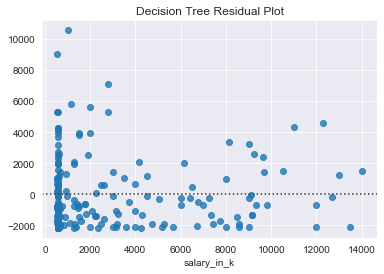

In [53]:
sns.residplot(y_test, decisiontree_predict)
plt.title('Decision Tree Residual Plot')
plt.show()

In [55]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [56]:
rf_predict = rf.predict(X_test)

rf_mse = round(mean_squared_error(y_test, rf_predict), 1)

rf_dict = {'MSE': rf_mse}
rf_dict

{'MSE': 15203172.1}

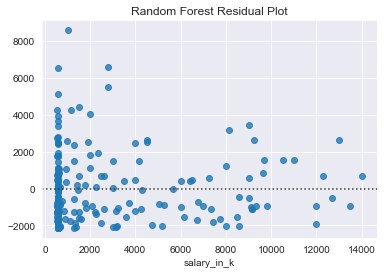

In [57]:
sns.residplot(y_test, rf_predict)
plt.title('Random Forest Residual Plot')
plt.show()

In [58]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)>

In [59]:
n_estimators = [25, 50, 75, 100, 150]
max_features = ['auto', 'sqrt', 'log2', None]
max_depth = [2, 3, 4, 6]
min_samples_split = [2, 10, 20]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
             'max_depth': max_depth,
              'min_samples_split': min_samples_split,
             'bootstrap': bootstrap}



grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    verbose = 1,
    iid = False,
    cv = 3)

In [60]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'bootstrap': [True, False], 'max_depth'

In [61]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 20,
 'n_estimators': 50}

In [62]:
rf_grid = RandomForestRegressor(random_state = 1, bootstrap = False, max_depth = 6, max_features = 'sqrt',
                               min_samples_split = 20, n_estimators = 50)
rf_grid.fit(X_train, y_train)

grid_predict = rf_grid.predict(X_test)
grid_mse = round(mean_squared_error(y_test, grid_predict), 1)

grid_dict = {'MSE': grid_mse}
grid_dict

{'MSE': 11012030.3}

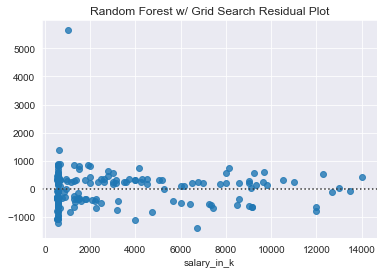

In [63]:
sns.residplot(y_test, grid_predict)
plt.title('Random Forest w/ Grid Search Residual Plot')
plt.show()

In [64]:
actuals = y_test.reset_index()
actuals = actuals.drop(columns=['index'], axis=1)
actuals.head()

,salary_in_k
0,13000.0
1,570.0
2,4750.0
3,1500.0
4,575.0


In [65]:
predictions = pd.DataFrame(grid_predict)
predictions

,0
0,3136.349938
1,2209.493413
2,2001.239846
3,2336.494154
4,3507.557972
...,...
194,2370.736060
195,2970.234678
196,2273.601904
197,3003.844674


In [66]:
predictions.head()
predictions.rename(columns={0: 'Predictions'}, inplace=True)
predictions['Predictions'] = predictions['Predictions'].map(lambda x: round(x, 1))
predictions.head()

,Predictions
0,3136.3
1,2209.5
2,2001.2
3,2336.5
4,3507.6


In [67]:
predictions = pd.concat([predictions, actuals], axis=1)

In [68]:
predictions.mean()

Predictions    2740.479899
salary_in_k    2815.598492
dtype: float64

In [69]:
y_test.mean()

2815.598492462311

In [70]:
pd.set_option('display.max_rows', None)

In [71]:
predictions

,Predictions,salary_in_k
0,3136.3,13000.0
1,2209.5,570.0
2,2001.2,4750.0
3,2336.5,1500.0
4,3507.6,575.0
5,1684.6,559.1
6,2336.5,559.1
7,2970.2,560.0
8,3226.5,565.0
9,2228.7,1350.0


In [72]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [73]:
ada_predict = ada.predict(X_test)
ada_mse = round(mean_squared_error(y_test, ada_predict), 1)

ada_dict = {'MSE': ada_mse}
ada_dict

{'MSE': 11969117.9}

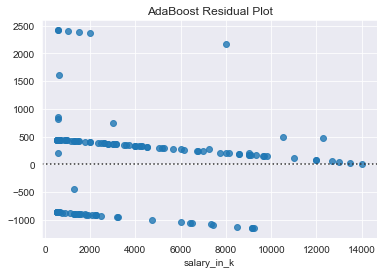

In [74]:
sns.residplot(y_test, ada_predict)
plt.title('AdaBoost Residual Plot')
plt.show()